# Applied Linear Regression

This is the first task given under the internship programme of **The Sparks Foundation**.

The task is about to demonstrate the understanding of **Linear Regression** and its application using **Scikit-Learn API.**

### Created by: Aditya Gupta

## 1. Problem Statement

In this task, we have to predict the percentage of marks that a student is expected to score, based upon the number of hours they study.

## 2. Intuition

Our target is the percentage of marks scored, which is a continuous variable, hence it is a **regression** problem.
We will be having **no. of hours studied** as an **independent** feature and **scores** as a dependant feature.

---

## 3. Loading the data

In [49]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import joblib
sns.set()

In [4]:
# loading data from url
data = pd.read_csv('http://bit.ly/w-data')
print("Number of Records: ", data.shape[0])

Number of Records:  25


In [8]:
# look at the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 4. Data Visualisation

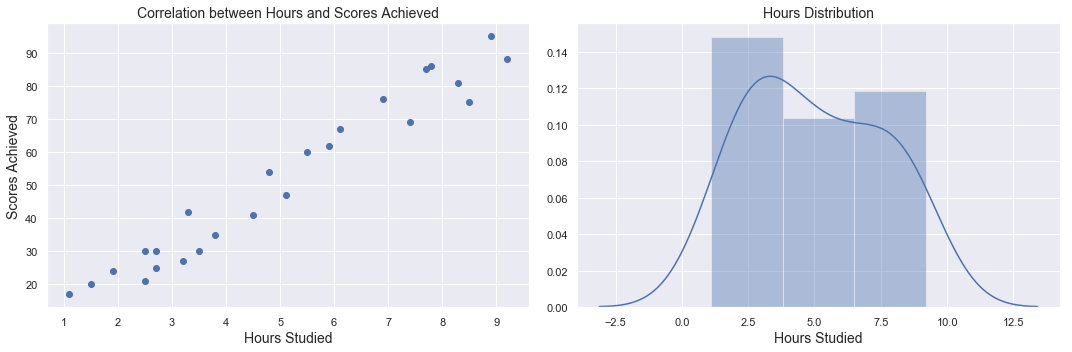

In [21]:
plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(121)
plt.scatter(x= data.Hours, y= data.Scores)
plt.xlabel('Hours Studied', fontsize= 14)
plt.ylabel('Scores Achieved', fontsize= 14)
plt.title("Correlation between Hours and Scores Achieved", fontsize= 14)

plt.subplot(122)
sns.distplot(data.Hours)
plt.xlabel("Hours Studied", fontsize= 14)
plt.title("Hours Distribution", fontsize= 14)

plt.tight_layout()
plt.show()

## 5. Splitting the data

We will now split the data into independant and dependant features.
Then, we will divide them into training and test sets with the ratio of 80:20.

In [29]:
# split the data into independant and dependant features
X = np.reshape(data.Hours.values, (-1, 1)) #Independant Feature
y = data.Scores.values #Dependant Feature

# split the features into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

## 6. Model Training

In [30]:
# initialize a model
model = LinearRegression()

# train the model on training set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 7. Plot the Regression line

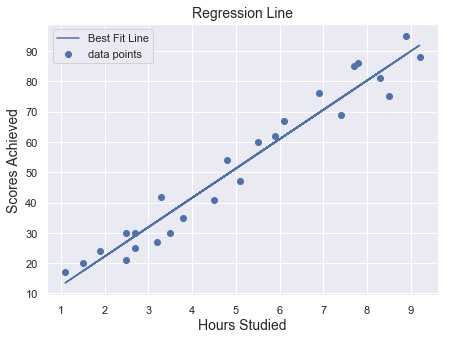

In [40]:
line = model.coef_*X+model.intercept_

plt.rcParams['figure.figsize'] = (7, 5)
plt.scatter(X, y, label= 'data points')
plt.plot(X, line, label= 'Best Fit Line')
plt.legend()
plt.xlabel("Hours Studied", fontsize= 14)
plt.ylabel('Scores Achieved', fontsize= 14)
plt.title("Regression Line", fontsize= 14)
plt.show()

## 8. Evaluating the model

Now, let us make predictions on the test set and evaluate our model.

In [43]:
#make predictions on test set
predictions = model.predict(X_test)

# calculate the error
error = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error: ", error)

Mean Absolute Error:  3.920751190209927


## 9. Make Predictions

In [46]:
hours = [[9.5]]

# make predictions
predicted_score = model.predict(hours)
print("Hours: ", hours[0][0])
print("Predicted Score: ", predicted_score[0])

Hours:  9.5
Predicted Score:  94.80663482122887


## 10. Save the model

In [50]:
joblib.dump(model, 'linear_regression_model.sav')

['linear_regression_model.sav']